<a href="https://colab.research.google.com/github/EmmanuelABonsu/CE888/blob/main/src/lab_6/Lab_6_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [152]:
df_dictionary = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')
df_dictionary.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [153]:
# Adding Export, Import and Health features to country data according to the definition in dictionary
df_country['exports'] = df_country['exports']*df_country['gdpp']/100
df_country['imports'] = df_country['imports']*df_country['gdpp']/100
df_country['health'] = df_country['health']*df_country['gdpp']/100

df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [154]:
print("The number of countries : ",df_country.shape[0])

The number of countries :  167


In [155]:
# Checking Null Values
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [156]:
# Performing PCA Analysis
from sklearn.preprocessing import StandardScaler
df_country_a = df_country.drop('country',1) #Drop string feature country name.
standard_scaler = StandardScaler()
df_country_scaled = standard_scaler.fit_transform(df_country_a)

In [157]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_country_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [158]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

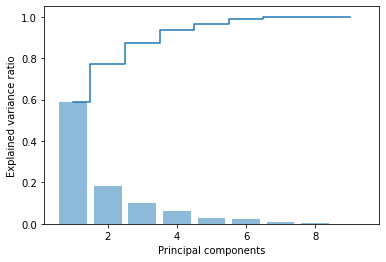

In [159]:
import matplotlib.pyplot as plt
plt.bar(range(1, 10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA_WINE.png', dpi=300)
plt.show()

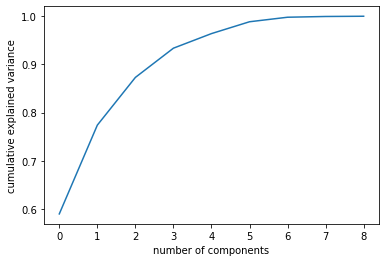

In [160]:
# Scree Plot
%matplotlib inline
fig = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**5 Principal Components explains about 98% of Data**

In [161]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [162]:
df_pca = pca_final.fit_transform(df_country_scaled)
df_pca.shape

(167, 5)

In [163]:
pc = np.transpose(df_pca)
corr_matrix = np.corrcoef(pc)

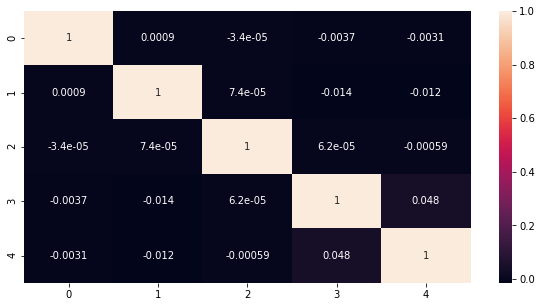

In [164]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix,annot = True)
plt.show()

In [165]:
pca_df = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [166]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


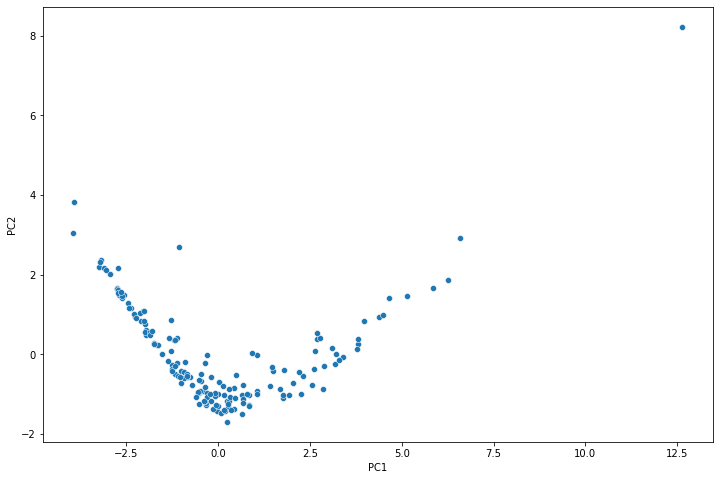

In [167]:
# Scatter plot with first 2 principal components
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

In [168]:
data_3 = pca_df

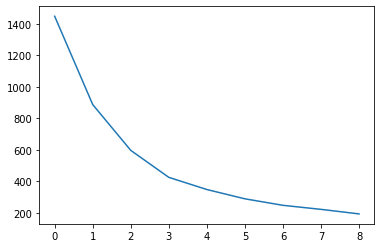

In [169]:
# Finding best cluster number with Elbow plot
from sklearn.cluster import KMeans

res = []
for num_clusters in list(range(1,10)):
    model_best_cluster = KMeans(n_clusters = num_clusters, max_iter=50)
    model_best_cluster.fit(data_3)
    res.append(model_best_cluster.inertia_)

plt.plot(res)
plt.show()

3 Custers is the most **optimal**

In [170]:
# Final Cluster
model_final_cluster = KMeans(n_clusters = 3)
model_final_cluster.fit(data_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [171]:
data_4 = pca_df
data_4.index = pd.RangeIndex(len(dat4.index))
data_km = pd.concat([data_4, pd.Series(model_clus2.labels_)], axis=1)
data_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
data_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0
...,...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251,0
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066,0
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132,0
165,-1.802840,0.584669,1.179551,0.051510,-0.274608,2


In [172]:
data_km['ClusterID'].value_counts()

0    91
2    48
1    28
Name: ClusterID, dtype: int64

In [173]:
data_5 = pd.merge(df_country,data_km, left_index=True,right_index=True)
data_5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [174]:
data_6 = data_5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
data_6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [175]:
Cluster_GDPP=pd.DataFrame(data_6.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(data_6.groupby(["ClusterID"]).child_mort.mean())
Cluster_exports=pd.DataFrame(data_6.groupby(["ClusterID"]).exports.mean())
Cluster_income=pd.DataFrame(data_6.groupby(["ClusterID"]).income.mean())
Cluster_health=pd.DataFrame(data_6.groupby(["ClusterID"]).health.mean())
Cluster_imports=pd.DataFrame(data_6.groupby(["ClusterID"]).imports.mean())
Cluster_inflation=pd.DataFrame(data_6.groupby(["ClusterID"]).inflation.mean())
Cluster_life_expec=pd.DataFrame(data_6.groupby(["ClusterID"]).life_expec.mean())
Cluster_total_fer=pd.DataFrame(data_6.groupby(["ClusterID"]).total_fer.mean())

In [176]:
df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)

In [177]:
df.columns = ["GDPP","child_mort","income","exports","health","imports","inflation","life_expec","total_fer"]
df

,GDPP,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
0,7979.912088,20.357143,13968.021978,3604.149434,547.279455,3710.446386,7.070549,73.460440,2.235055
1,48114.285714,5.046429,50178.571429,31038.239286,4327.163214,25818.100000,3.014679,80.514286,1.760714
2,1909.208333,91.610417,3897.354167,879.063521,114.821765,827.028771,11.911146,59.239583,4.992083


<Figure size 720x432 with 0 Axes>

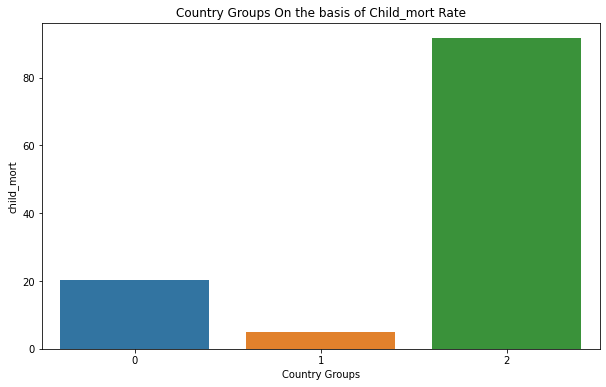

In [178]:
fig = plt.figure(figsize = (10,6))
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df.index,y='child_mort',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child_mort Rate')
plt.show()

Based on the Child Mortality rate in the plot above, Cluster 1 = Developed countries, 0 = Developing Countries and 2 = Under Developed Countries.

In [180]:
# Under developed Countries
data_6.loc[data_6['ClusterID'] == 2]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,2
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,2


In [181]:
# Developed Countries
data_6.loc[data_6['ClusterID'] == 1]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1


In [182]:
# Developing Countries
data_6.loc[data_6['ClusterID'] == 0]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,437.46,80.178,393.30,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.90,75.4,2.47,13500,0
